# 📰 Fake News Dataset Builder
This notebook scrapes real news articles via NewsAPI and allows manual labeling to create a custom dataset for fake news detection.

In [ ]:
!pip install requests pandas tqdm

In [ ]:
!pip uninstall -y transformers
!pip uninstall -y tokenizers
!pip uninstall -y sentence-transformers

!pip install torch==2.0.1
!pip install transformers==4.30.2
!pip install peft==0.5.0 # Install a compatible version of peft
!pip install datasets==2.14.5
!pip install scikit-learn==1.3.2
!pip install numpy==1.26.4

Found existing installation: transformers 4.30.2
Uninstalling transformers-4.30.2:
  Successfully uninstalled transformers-4.30.2
Found existing installation: tokenizers 0.13.3
Uninstalling tokenizers-0.13.3:
  Successfully uninstalled tokenizers-0.13.3
Found existing installation: sentence-transformers 4.1.0
Uninstalling sentence-transformers-4.1.0:
  Successfully uninstalled sentence-transformers-4.1.0
  Using cached transformers-4.30.2-py3-none-any.whl.metadata (113 kB)
  Using cached tokenizers-0.13.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
Using cached tokenizers-0.13.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.1/362.1 kB 37.5 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
from tqdm import tqdm

API_KEY = "406c41fb382c407bae9aabb0f3faeead"  # 🔁 Replace with your NewsAPI key

def fetch_articles(query, page_size=30):
    url = f"https://newsapi.org/v2/everything?q={query}&language=en&pageSize={page_size}&apiKey={API_KEY}"
    response = requests.get(url)
    data = response.json()
    if data.get("status") != "ok":
        print("Error:", data.get("message"))
        return []
    return data.get("articles", [])

topics = ["elections", "COVID", "AI", "climate change", "sports"]
all_data = []

for topic in tqdm(topics):
    articles = fetch_articles(topic)
    for a in articles:
        all_data.append({
            "title": a["title"],
            "description": a["description"],
            "content": a["content"],
            "source": a["source"]["name"],
            "publishedAt": a["publishedAt"],
            "url": a["url"],
            "label": ""  # To be labeled later
        })

df_real = pd.DataFrame(all_data)
df_real.to_csv("real_news.csv", index=False)
df_real.head()


 20%|██        | 1/5 [00:01<00:04,  1.05s/it]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 40%|████      | 2/5 [00:02<00:03,  1.02s/it]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 60%|██████    | 3/5 [00:03<00:01,  1.00it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 80%|████████  | 4/5 [00:03<00:00,  1.02it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


""


In [ ]:
import requests
import pandas as pd
from tqdm import tqdm

API_KEY = "406c41fb382c407bae9aabb0f3faeead"

fake_topics = ["aliens", "miracle cure", "5G conspiracy", "flat earth", "hoax", "reptilian", "illuminati", "fake vaccine", "end of world"]

def fetch_articles(query, page_size=30):
    url = f"https://newsapi.org/v2/everything?q={query}&language=en&pageSize={page_size}&apiKey={API_KEY}"
    response = requests.get(url)
    data = response.json()
    if data.get("status") != "ok":
        print("Error:", data.get("message"))
        return []
    return data.get("articles", [])

all_fake_articles = []

for topic in tqdm(fake_topics):
    articles = fetch_articles(topic)
    for a in articles:
        all_fake_articles.append({
            "title": a["title"],
            "description": a["description"],
            "content": a["content"],
            "source": a["source"]["name"],
            "publishedAt": a["publishedAt"],
            "url": a["url"],
            "label": 0  # Fake
        })

df_fake = pd.DataFrame(all_fake_articles)
df_fake = df_fake.drop_duplicates(subset="title")
df_fake = df_fake[df_fake["content"].notna()]
df_fake["text"] = df_fake["title"] + " " + df_fake["description"] + " " + df_fake["content"]
df_fake = df_fake[["text", "label"]]
df_fake.to_csv("fake_news.csv", index=False)
df_fake.head()


 11%|█         | 1/9 [00:01<00:08,  1.00s/it]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 22%|██▏       | 2/9 [00:02<00:07,  1.00s/it]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 33%|███▎      | 3/9 [00:02<00:05,  1.02it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 44%|████▍     | 4/9 [00:03<00:04,  1.02it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 56%|█████▌    | 5/9 [00:04<00:02,  1.37it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 67%|██████▋   | 6/9 [00:04<00:01,  1.75it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 78%|███████▊  | 7/9 [00:05<00:01,  1.43it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


 89%|████████▉ | 8/9 [00:06<00:00,  1.28it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


100%|██████████| 9/9 [00:07<00:00,  1.21it/s]

Error: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.


KeyError: 'content'

In [ ]:
import pandas as pd

# Load and label
real_df = pd.read_csv("/content/real_news.csv")
real_df["label"] = 1

fake_df = pd.read_csv("fake_news.csv")
fake_df["label"] = 0

# Clean fake_df (already done earlier, but ensuring again)
fake_df = fake_df.drop_duplicates(subset="text")
fake_df = fake_df[fake_df["text"].notna()]


In [ ]:
# Combine both real and fake news
full_df = pd.concat([real_df, fake_df], ignore_index=True)

# Drop duplicates and missing values
full_df = full_df.drop_duplicates()
full_df = full_df[full_df["content"].notna()]

# Build single 'text' column
full_df["text"] = full_df["title"].fillna("") + " " + full_df["description"].fillna("") + " " + full_df["content"].fillna("")
full_df = full_df[["text", "label"]]  # Only needed columns

# Save combined file
full_df.to_csv("balanced_labeled_news.csv", index=False)
print("✅ Saved: balanced_labeled_news.csv")


✅ Saved: balanced_labeled_news.csv


In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Load existing final dataset
df = pd.read_csv("final_news_dataset.csv")

# Optional clean again
df = df[df["text"].str.len() > 100]
df = df.drop_duplicates(subset="text")
df = df[df["text"].notna()]
df = df[df["label"].isin([0, 1])]  # remove any invalid labels

# Split fake and real
df_fake = df[df["label"] == 0]
df_real = df[df["label"] == 1]

# Balance: undersample fake to match real
df_fake_balanced = df_fake.sample(n=len(df_real), random_state=42)
df_balanced = pd.concat([df_real, df_fake_balanced], ignore_index=True)

# Shuffle and save
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)
df_balanced.to_csv("final_news_dataset.csv", index=False)

# Show results
print("✅ Balanced dataset label counts:")
print(df_balanced["label"].value_counts())
df_balanced.head()


✅ Balanced dataset label counts:
label
1    138
0    138
Name: count, dtype: int64


,text,label,text_len
0,"Winter fuel payment U-turn in place this year,...",1,415
1,RFK Jr. names new slate of vaccine advisers af...,1,452
2,A long-lost Duke Nukem prototype resurfaces af...,0,359
3,"With $2.7 billion settlement approved, college...",1,503
4,Buffy The Vampire Slayer's 10 Scariest Monster...,0,422


In [ ]:
df = pd.read_csv("/content/final_news_dataset.csv")
print("📄 Columns in dataset:", df.columns.tolist())
print("🔢 Label counts:\n", df["label"].value_counts())
print("📄 Total rows:", len(df))


📄 Columns in dataset: ['text', 'label', 'text_len']
🔢 Label counts:
 label
1    138
0    138
Name: count, dtype: int64
📄 Total rows: 276


🧹 Removed empty/short texts. Remaining samples: 276
🔁 Removed duplicates. Samples left: 276
✅ Valid labels check passed. Label counts:
label
1    138
0    138
Name: count, dtype: int64


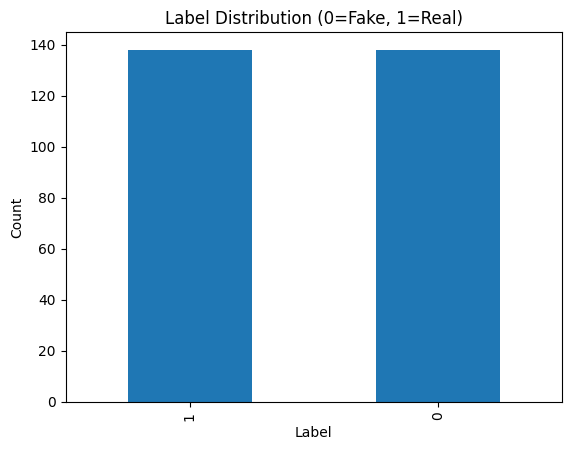

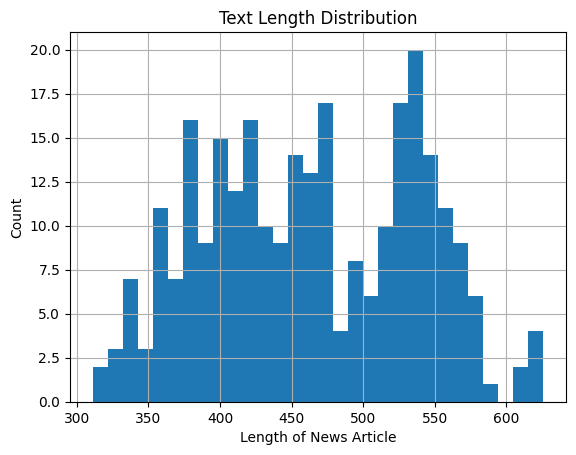

📦 Final cleaned dataset saved again as 'final_news_dataset.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load final dataset
df = pd.read_csv("final_news_dataset.csv")

# Step 1: Remove missing or very short text
df = df[df["text"].notna()]
df = df[df["text"].str.len() > 100]
print(f"🧹 Removed empty/short texts. Remaining samples: {len(df)}")

# Step 2: Remove duplicate texts
df = df.drop_duplicates(subset="text")
print(f"🔁 Removed duplicates. Samples left: {len(df)}")

# Step 3: Ensure valid binary labels
df = df[df["label"].isin([0, 1])]
print(f"✅ Valid labels check passed. Label counts:\n{df['label'].value_counts()}")

# Step 4: Check label balance visually
df["label"].value_counts().plot(kind='bar', title='Label Distribution (0=Fake, 1=Real)')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Step 5: Check and visualize text length
df["text_len"] = df["text"].apply(len)
df["text_len"].hist(bins=30)
plt.title("Text Length Distribution")
plt.xlabel("Length of News Article")
plt.ylabel("Count")
plt.show()

# Step 6: Shuffle the dataset
df = shuffle(df, random_state=42).reset_index(drop=True)

# Step 7: Save final cleaned dataset
df.to_csv("final_news_dataset.csv", index=False)
print("📦 Final cleaned dataset saved again as 'final_news_dataset.csv'")


In [ ]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

# Load the final dataset
df = pd.read_csv("final_news_dataset.csv")

# Separate text and labels
texts = df["text"].tolist()
labels = df["label"].tolist()

# Split into train/test (Stratified to preserve label ratio)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize (truncate long news)
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Convert to PyTorch Dataset for Training

In [ ]:
import torch

# Custom PyTorch Dataset class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            key: torch.tensor(val[idx]) for key, val in self.encodings.items()
        } | {"labels": torch.tensor(self.labels[idx])}

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)


In [ ]:
from transformers import BertForSequenceClassification, TrainingArguments

# Load pre-trained BERT model with a classification head
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,  # Increased to 5 for better learning
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    report_to="none"  # No WandB or Hub tracking
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the check

In [ ]:
from transformers import Trainer

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.619100,0.721207
2,0.278700,0.412137
3,0.194600,0.640928
4,0.004800,0.393770
5,0.002800,0.414769


TrainOutput(global_step=140, training_loss=0.2219673225656152, metrics={'train_runtime': 71.7035, 'train_samples_per_second': 15.341, 'train_steps_per_second': 1.952, 'total_flos': 87052759332000.0, 'train_loss': 0.2219673225656152, 'epoch': 5.0})

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = trainer.predict(val_dataset)
y_true = val_labels
y_pred = predictions.predictions.argmax(axis=-1)

print("✅ Classification Report:\n", classification_report(y_true, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.83      0.86      0.84        28

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56

✅ Confusion Matrix:
 [[23  5]
 [ 4 24]]


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned model
model = BertForSequenceClassification.from_pretrained("saved_model", output_attentions=True)
tokenizer = BertTokenizer.from_pretrained("saved_model")

# Put model in eval mode
model.eval()

# Sample input
text = "Aliens from Mars have landed in Canada with miracle vaccine."

# Tokenize
inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

# Get output with attention
with torch.no_grad():
    outputs = model(**inputs)

# Extract attentions (last layer)
attentions = outputs.attentions  # List of attention tensors from each layer

# Example: Get attention from the last layer, head 0
last_layer_attention = attentions[-1]  # Shape: [1, num_heads, seq_len, seq_len]
head_0 = last_layer_attention[0][0]   # Shape: [seq_len, seq_len]

# Map tokens to words
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
print("🧠 Attention Map for First Head in Last Layer:")
for i, token in enumerate(tokens):
    print(f"{token:15s}: {head_0[i][:len(tokens)].tolist()}")


🧠 Attention Map for First Head in Last Layer:
[CLS]          : [0.13322293758392334, 0.05067168548703194, 0.025262026116251945, 0.037419356405735016, 0.0648098737001419, 0.04687899351119995, 0.02042708359658718, 0.04636616259813309, 0.03017929196357727, 0.05427324399352074, 0.09159601479768753, 0.03566974774003029, 0.3632235825061798]
aliens         : [0.017688104882836342, 0.004247291479259729, 0.0015927107306197286, 0.004262252245098352, 0.006653931923210621, 0.0064731198363006115, 0.0016174328047782183, 0.002096432028338313, 0.002732654334977269, 0.005550583358854055, 0.010547695681452751, 0.005603402387350798, 0.9309344291687012]
from           : [0.01258847489953041, 0.006136540323495865, 0.0015655832830816507, 0.007246927358210087, 0.007434471510350704, 0.009522991254925728, 0.001853364403359592, 0.0020847904961556196, 0.0019029867835342884, 0.00429777754470706, 0.007970666512846947, 0.0043380046263337135, 0.933057427406311]
mars           : [0.06907745450735092, 0.01202333532273

In [ ]:
model.save_pretrained("saved_model")
tokenizer.save_pretrained("saved_model")


('saved_model/tokenizer_config.json',
 'saved_model/special_tokens_map.json',
 'saved_model/vocab.txt',
 'saved_model/added_tokens.json')

In [ ]:
def predict_fake_news(text):
    # Move model to the correct device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # Tokenize input and move to the same device
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Inference
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        predicted_label = torch.argmax(probs, dim=1).item()
        confidence = probs[0][predicted_label].item()

    # Result
    label_name = "🟢 Real News" if predicted_label == 1 else "🔴 Fake News"
    print(f"\n📰 Input: {text[:100]}...")
    print(f"✅ Prediction: {label_name}")
    print(f"📊 Confidence: {confidence:.2f}")


In [ ]:
sample_article = """
Aliens from Mars have landed in Canada, bringing advanced AI robots that cure diseases overnight.
"""
predict_fake_news(sample_article)



📰 Input: 
Aliens from Mars have landed in Canada, bringing advanced AI robots that cure diseases overnight.
...
✅ Prediction: 🔴 Fake News
📊 Confidence: 0.68


In [ ]:
sample_article = """
NASA has announced a new mission to send astronauts to the Moon under the Artemis program.
Scheduled for 2026, the mission will land the first woman and the first person of color on the lunar surface.
NASA aims to establish a long-term human presence on the Moon and prepare for future missions to Mars.
"""

predict_fake_news(sample_article)



📰 Input: 
NASA has announced a new mission to send astronauts to the Moon under the Artemis program. 
Schedul...
✅ Prediction: 🟢 Real News
📊 Confidence: 0.98


In [ ]:
# Save model and tokenizer to a folder
model.save_pretrained("saved_model")
tokenizer.save_pretrained("saved_model")

print("✅ Model and tokenizer saved in 'saved_model' directory.")


✅ Model and tokenizer saved in 'saved_model' directory.


### 🖊️ Manual Labeling
You can open the CSV file in Excel or any spreadsheet tool and label the `label` column as `real` or `fake`. Once labeled, save it as `labeled_news_dataset.csv`.